<a href="https://colab.research.google.com/github/AV-Gorshkov/Python_netology/blob/main/PY_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Контекст
Дан набор данных по оттоку клиентов. Набор данных содержит всего 5 000 записей (то есть абонентов).

Перечень полей:
- state – штат
- account length – абонентский стаж
-area code – код региона
-phone number – номер телефона
-international plan – тарифный план для международных звонков
-voice mail plan – тарифный план для голосовой почты
-number vmail messages – количество сообщений голосовой почты
-total day minutes – общая длительность звонков в дневное время (мин)
-total day calls – общее количество звонков в дневное время
-total day charge – общая стоимость звонков в дневное время
-total eve minutes – общая длительность звонков в вечернее время (мин)
-total eve calls – общее количество звонков в вечернее время
-total eve charge – общая стоимость звонков в вечернее время
-total night minutes – общая длительность звонков в ночное время (мин)
-total night calls – общее количество звонков в ночное время
-total night charge – общая стоимость звонков в ночное время
-total intl minutes – общая длительность международных звонков (мин)
-total intl calls – общее количество международных звонков
-total intl charge – общая стоимость международных звонков
-number customer service calls – количество звонков в службу поддержки
-churned – покинул ли клиент компанию

Описание задания
Ваша задача - используя pandas или pyspark, ответить на следующие вопросы:

Построить гистограмму количества звонков в техническую поддержку
Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)
Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (доп. материалы общего количества минут и количества звонков в техподдержку
Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента
Вывести top-5 самых много и самых мало говорящих клиентов
Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата
Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалить колонку, если вы делаете решение на pyspark
Разбить данные на множества для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные атрибуты)
Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [33]:
# импорт библиотек

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [34]:
# Загружаем данные в переменную df из файла homework.csv

param = r'/content/drive/My Drive/Нетология/Аналитика_Big_Data/дз_10/'
file = 'churn.csv'

df_client = pd.read_csv(f'{param}{file}', sep = ',')

df_client.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [35]:
# изучим данные

df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   international_plan             5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [36]:
#  основные статистики
df_client.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [37]:
# столбцы датафрема
df_client.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

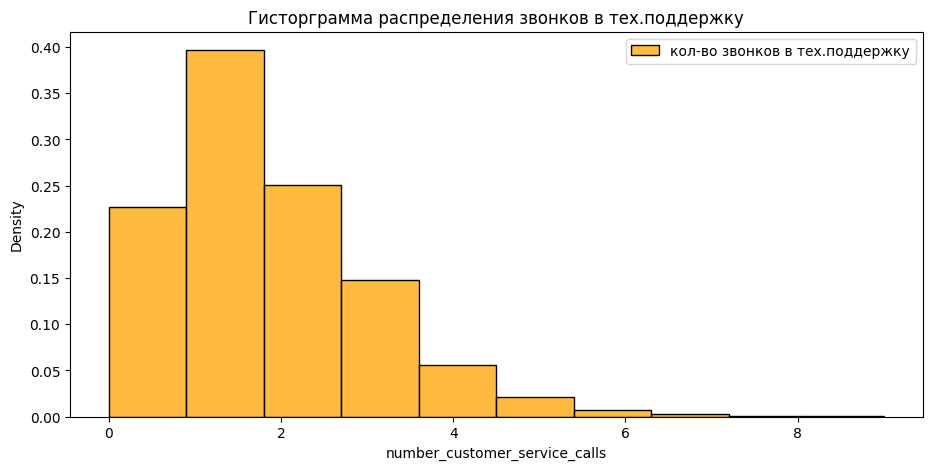

In [38]:
# Задание_1
# Построить гистограмму количества звонков в техническую поддержку

# df_client['number_customer_service_calls'].hist()

plt.figure(figsize=(11, 5) )

sns.histplot( data = df_client['number_customer_service_calls'], bins=10 , stat="density", color='orange', label='кол-во звонков в тех.поддержку')
plt.title('Гисторграмма распределения звонков в тех.поддержку')
plt.legend()
plt.show()

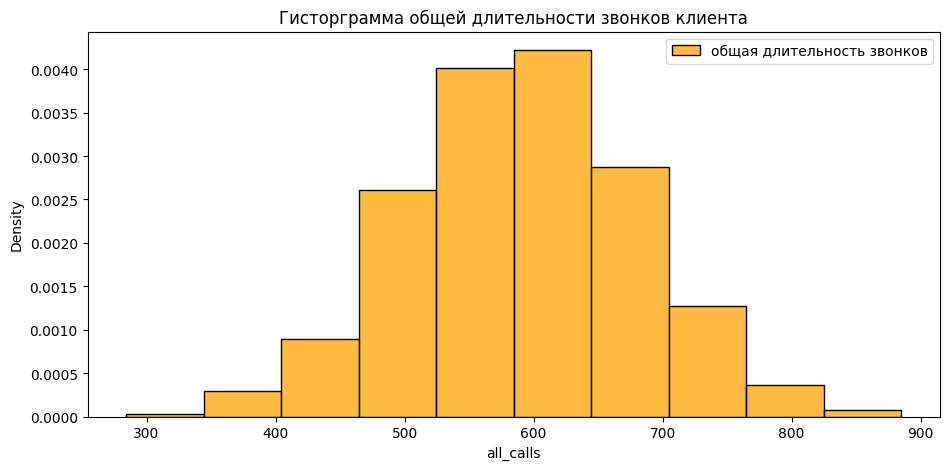

In [39]:
# Задание_2
# Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)
df_client['all_calls'] = df_client['total_day_minutes'] + df_client['total_eve_minutes'] + df_client['total_night_minutes'] + df_client['total_intl_minutes']

# df_client[['phone_number','all_calls']].head()

plt.figure(figsize=(11, 5) )

sns.histplot( data = df_client['all_calls'], bins=10 , stat="density", color='orange', label='общая длительность звонков')
plt.title('Гисторграмма общей длительности звонков клиента')
plt.legend()
plt.show()


In [40]:
# Задание_3
# Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции - общего количества минут и количества звонков в техподдержку

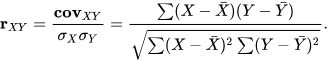

In [41]:
def func_corr (data, list_name):

  x = data [ list_name[0]]
  y = data [ list_name[1]]

  if len(x) != len(y):
    return print('кол-во элементов в заданных выборках не одинаково')

  mean_x = x.mean()
  mean_y = y.mean()

  _sum_xy = 0
  _sum_x = 0
  _sum_y = 0

  for el in range(len(x)):

    _sum_xy += ( ( x[el] - mean_x) * ( y[el] - mean_y) )
    _sum_x += ( (x[el] - mean_x) ** 2)
    _sum_y += ( (y[el] - mean_y) ** 2)

  coeff_corr = _sum_xy / ( (_sum_x * _sum_y ) ** (1/2) )

  return coeff_corr

list_name = ['all_calls', 'number_customer_service_calls' ]
coeff_corr = func_corr(df_client, list_name)

print(coeff_corr)

-0.01140791082744126


In [42]:
# линейный коэффициент корреляции в Pandas
# df_client[['all_calls', 'number_customer_service_calls' ]].corr()

df_client['all_calls'].corr(df_client['number_customer_service_calls'])

-0.011407910827441392

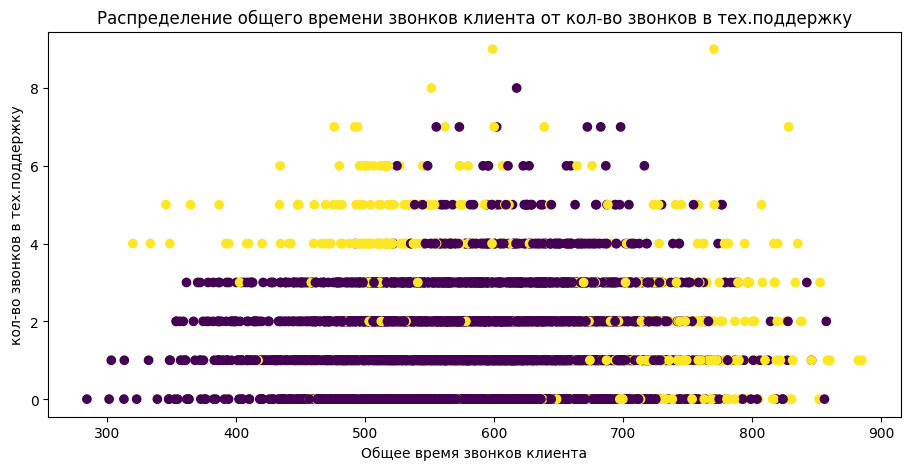

In [43]:
# Задание_4
# Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

plt.figure(figsize=(11, 5) )

plt.scatter( df_client['all_calls'],
            df_client['number_customer_service_calls'],
            c=df_client['churned']
          )
plt.title('Распределение общего времени звонков клиента от кол-во звонков в тех.поддержку')
plt.xlabel('Общее время звонков клиента')
plt.ylabel('кол-во звонков в тех.поддержку')

plt.show()

In [44]:
# Задание_5
# Вывести top-5 самых много и самых мало говорящих клиентов

df_top_calls = df_client.groupby('phone_number').agg({'all_calls': 'sum'})

print('top-5 самых много говорящих клиентов')
df_top_calls.sort_values('all_calls', ascending=False).head(5)

top-5 самых много говорящих клиентов


,all_calls
phone_number,
345-9140,885.0
352-6976,882.2
345-3787,860.2
410-3888,858.2
370-4667,857.4


In [45]:
print('top-5 самых мало говорящих клиентов')
df_top_calls.sort_values('all_calls', ascending=True).head(5)

top-5 самых мало говорящих клиентов


,all_calls
phone_number,
331-3174,284.3
380-5246,301.5
362-8044,303.2
405-9233,313.0
375-8934,313.3


In [49]:
# Задание_6
# Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

fun_agg = {'total_day_minutes' : 'sum', 'total_day_charge': 'sum', 'phone_number': 'count', 'churned': 'sum' }

column = {'total_day_minutes':'общее время разговора(мин)', 'total_day_charge' : 'общая стоимость звонков', 'phone_number': 'общее кол-во абонентов','churned': 'кол-во ушедших абонентов', 'state': 'штат'}

df_state = df_client.groupby(['state']).agg(fun_agg).reset_index().rename(columns=column)

df_state['ср.стоимость минуты'] = (df_state['общая стоимость звонков'] / df_state['общее время разговора(мин)'] ).round(3)

df_state['% оттока абонентов по штату'] = (100 * df_state['кол-во ушедших абонентов'] / df_state['общее кол-во абонентов'] ).round(2)

df_state['% оттока абонентов среди всех штатов'] = 100 * ( df_state['кол-во ушедших абонентов'] / df_state['общее кол-во абонентов'].sum() )

df_state[[ 'штат', 'ср.стоимость минуты', '% оттока абонентов по штату', '% оттока абонентов среди всех штатов' ]].sort_values('% оттока абонентов по штату',ascending=False).head(7)

,штат,ср.стоимость минуты,% оттока абонентов по штату,% оттока абонентов среди всех штатов
4,CA,0.17,26.92,0.28
31,NJ,0.17,25.00,0.56
47,WA,0.17,24.49,0.48
43,TX,0.17,22.41,0.52
26,MT,0.17,21.21,0.42
20,MD,0.17,20.59,0.42
33,NV,0.17,18.89,0.34


In [ ]:
# Задание_7
# Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалить колонку, если вы делаете решение на pyspark

df_one_hot = df_client.copy()

df_one_hot = pd.get_dummies (df_one_hot, columns=['state'], drop_first= True)
df_one_hot.head()

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Задание_8
# Разбить данные на множества для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные атрибуты)

# отберем признаки для датафрейма

name = [ 'state', 'phone_number', 'area_code', 'international_plan', 'voice_mail_plan', 'all_calls' ]

df_data = df_one_hot.loc[ : , ~ df_one_hot.columns.isin(name) ]

df_data.head(7)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0
5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,0,0,0,0,0
6,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# формирование выбороки и целевой переменной

df_model = df_data.loc[ : , df_data.columns != 'churned' ]

data_target = pd.array(df_data['churned'])

# разделяем выборку на тренировочную и тестовую

x_train, x_test, y_train, y_test = train_test_split(df_model, data_target, train_size=0.2)

In [ ]:
# Задание_9
# Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

# построим модель LDA (Линейный дискриминантный анализ)
# обучаем модель и получаем коэфф. модели

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

print(f'коэфф модели:\n{lda.coef_[0]}')

коэфф модели:
[ 3.94319499e-03 -1.69128513e-02  1.22355925e+01 -6.63112484e-03
 -7.19042422e+01  1.85477016e+00  1.53675201e-04 -2.17516822e+01
  1.70341463e+00 -3.88244937e-03 -3.77748429e+01 -1.25654784e+01
 -1.01300134e-01  4.69653355e+01  6.02629322e-01  9.81389688e-02
  1.36079011e+00  1.38736355e-02  2.51095710e+00  1.18635574e+00
  4.62147665e-01  6.03061358e-01  1.43847632e+00  6.87500975e-01
  5.57795370e-01  4.55887845e-02  2.59571518e+00  3.56243774e-01
  1.79013417e-02  1.97959692e-01  1.54075975e+00  1.37371915e+00
  3.45696457e-01  2.24922317e+00  1.48155055e+00  1.59664717e+00
  1.24264066e+00  1.35095872e+00  1.66302646e+00  1.80826801e+00
  1.71965571e+00  6.78212544e-01  9.79632837e-01  5.77448361e-01
 -5.43030293e-01  1.11405283e+00  4.81646640e-01  1.72458616e+00
  8.90214587e-01  5.96127340e-01  1.98512215e+00  1.99491001e+00
  1.40911004e+00  2.10563340e-01  3.13786837e-01  5.03865292e-01
  5.75069916e-01  2.57679437e+00  1.80693874e+00 -3.23849374e-01
  2.0336143

In [ ]:
# делаем прогноз на тестовой выборке

y_pred = lda.predict(x_test)
print(f' y_pred = {y_pred}')

 y_pred = [False False False ... False False False]


Confusion matrix, without normalization
[[3306  145]
 [ 441  108]]


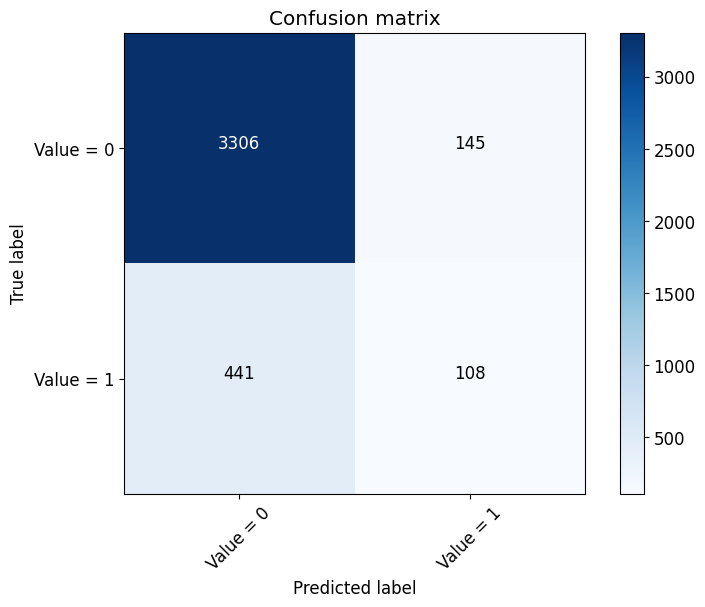

In [ ]:
#  матрица ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 12}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['Value = 0', 'Value = 1'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [ ]:
# точность модели

print( 'accuracy', accuracy_score(y_test, y_pred) )
print( 'f1', f1_score(y_test, y_pred, average='weighted') )

accuracy 0.8535
f1 0.8294773129000228


Точность модели LDA  accuracy = 0,853
значение F-мера = 0,829
На выходе получили среднюю модель для предсказания событий (точность предсказания 82,9% )

In [ ]:
# построим модель предсказания LR, с помощью логистической регрессии

lr = LogisticRegression()
lr.fit(x_train, y_train)

lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([False, False, False, ..., False, False, False])

In [ ]:
# точность модели

print( 'accuracy', accuracy_score(y_test, lr.predict(x_test) ) )
print( 'f1', f1_score(y_test, lr.predict(x_test), average='weighted' ) )

accuracy 0.8595
f1 0.816734340625903


Точность модели LR  accuracy = 0,859
значение F-мера = 0,816
На выходе получили среднюю модель для предсказания событий (точность предсказания 85,9% )

In [ ]:
#  построим еще одну модель для предсказания:
#  - возьмем исходный датафрейм и перекодируем категориальные признаки
#  - нормализуем все признаки

# добавим библиотеку для кодирования категориальных признаков

!pip3 install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
df_client.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'all_calls'],
      dtype='object')

In [ ]:
#  сформируем датафрейм для модели

name_2 = ['phone_number', 'area_code', 'international_plan', 'voice_mail_plan', 'all_calls', 'churned' ]

df_model_2 = df_client.loc[ : , ~ df_client.columns.isin(name_2) ]

df_model_2.head()

#  выполним полиномиальное кодирование (polynomial encoding)

import category_encoders as ce

encoder = ce.PolynomialEncoder(cols=['state'])
encoder.fit(df_model_2, verbose=1)
df_model_2 = encoder.fit_transform(df_model_2)
df_model_2.head()

/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,state_0,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,-0.237826,0.295218,-0.329330,0.345200,-0.345884,0.334099,-0.312580,0.284085,-0.251275,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,-0.228313,0.259792,-0.250291,0.207120,-0.138354,0.053456,0.037510,-0.124997,0.201020,...,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,1,-0.218800,0.225812,-0.179317,0.094402,0.009882,-0.112639,0.194693,-0.241878,0.247173,...,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,1,-0.228313,0.259792,-0.250291,0.207120,-0.138354,0.053456,0.037510,-0.124997,0.201020,...,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,1,-0.209287,0.193278,-0.116072,0.004579,0.108707,-0.192823,0.225951,-0.200483,0.124099,...,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
# приведем данные к единому масштабу

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_model_2)
df_scaled

array([[ 0.        , -1.64323029,  2.10455944, ..., -0.58423577,
        -0.0955088 , -0.43667564],
       [ 0.        , -1.57555138,  1.85066182, ..., -0.58423577,
         1.24598231, -0.43667564],
       [ 0.        , -1.50787248,  1.60712737, ...,  0.22991664,
         0.69597096, -1.20223603],
       ...,
       [ 0.        ,  1.26696265,  0.54490264, ..., -0.17715957,
         1.20573758, -0.43667564],
       [ 0.        ,  1.26696265,  0.54490264, ...,  0.63699285,
        -0.63210525, -1.20223603],
       [ 0.        , -0.62804671, -0.6157722 , ...,  4.70775494,
        -0.35039211, -1.20223603]])

In [ ]:
# разделяем выборку на тренировочную и тестовую

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_scaled, data_target, train_size=0.2)

In [ ]:
# обучаем модель LDA и получаем коэфф. модели

lda_2 = LinearDiscriminantAnalysis()
lda_2.fit(x_train_2, y_train_2)

print(f'коэфф модели:\n{lda_2.coef_[0]}')

# делаем прогноз на тестовой выборке

y_pred_2 = lda_2.predict(x_test_2)

#  точность модели

print( 'accuracy', accuracy_score(y_test_2, y_pred_2) )
print( 'f1', f1_score(y_test_2, y_pred_2,  average='weighted') )

коэфф модели:
[-3.75230081e-12  1.54818924e-01 -9.49287398e-02 -2.79727723e-01
  4.97067959e-02 -5.10311426e-02  9.40963466e-02  1.48926839e-02
 -4.96944166e-02 -2.09708882e-02  5.98010191e-02  3.31905239e-02
  2.42517264e-02  5.86354779e-02  1.11894806e-01  4.52334679e-02
 -1.44837997e-01  2.02373681e-02  3.91189145e-02 -1.60607399e-01
  4.06245114e-02 -7.19290847e-02  1.25905085e-01  1.15260510e-01
  2.03227246e-02 -1.23537538e-01  5.71764313e-02  9.32992520e-02
 -8.96819419e-02  1.43528898e-01  1.80360396e-01  1.31249722e-01
  3.09964583e-02 -7.00835707e-02 -1.77637010e-01 -9.65401157e-02
  1.40206121e-01 -8.76399661e-02  1.60613824e-02 -1.64003071e-01
 -3.69012781e-02  1.20449155e-01 -5.88944447e-02  9.78786193e-04
  2.28238786e-01 -2.25028681e-01 -1.47636573e-02 -5.50054476e-02
  5.70038222e-02 -5.49180570e-04  1.04112234e-01  1.53455811e-02
 -4.01388422e-01  2.13365133e+02  6.67333844e-02 -2.12741508e+02
 -2.09619646e+02 -1.08949338e-01  2.09949363e+02 -1.93513619e+01
  7.7120666

In [ ]:
#  обучаем модель LR и получаем коэфф. модели

lr_2 = LogisticRegression()
lr_2.fit(x_train_2, y_train_2)
lr_2.predict(x_test_2)

# точность модели

print( 'accuracy', accuracy_score(y_test_2, lr_2.predict(x_test_2) ) )
print( 'f1', f1_score(y_test_2, lr_2.predict(x_test_2), average='weighted' ) )

accuracy 0.8605
f1 0.8342481762560924


In [ ]:
#  модель случайного леса Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Реализация поиска по сетке - гиперпараметры модели

from sklearn.model_selection import GridSearchCV

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

grid = GridSearchCV( rf, param_grid=grid_space, cv=3, scoring='accuracy')
model_grid = grid.fit(x_train_2,y_train_2)

print('Параметры модели: ' + str(model_grid.best_params_))
print('Точность модели: ' + str(model_grid.best_score_))

Параметры модели: {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Точность модели: 0.8759957562352771


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [ ]:
# Реализация случайного поиска параметров модели

from scipy.stats import randint

#  гиперпараметры модели
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(x_train_2,y_train_2)

print('Параметры модели: ' + str(model_random.best_params_) )
print('Точность модели: ' + str(model_random.best_score_) )

Параметры модели: {'criterion': 'gini', 'max_depth': 70, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 10}
Точность модели: 0.8710027392662122


In [ ]:
#  модель дерева решений TR

from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier ()
tr.fit(x_train_2, y_train_2)

print(f'Точность модели: {accuracy_score(y_test_2, tr.predict(x_test_2) ) }' )

Точность модели: 0.85425


После проведенных преобразований датафрейма, наилучший результат у модели Случайного Леса = 0,875